In [50]:
import pandas as pd
from dataprep.eda import *
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns


In [51]:
PATH = '../../../data/raw/XLCoST_data/retrieval/nl2code_search'

## Program level

In [52]:
train_data = pd.read_json(f'{PATH}/program_level/Python/train.jsonl', lines=True)
test_data = pd.read_json(f'{PATH}/program_level/Python/test.jsonl', lines=True)
valid_data = pd.read_json(f'{PATH}/program_level/Python/valid.jsonl', lines=True)

In [53]:
train_data.head()

,idx,docstring_tokens,code_tokens,url
0,10005,"[Maximum, Prefix, Sum, possible, by, merging, ...","[def, maxPresum, (, a, ,, b, ), :, NEW_LINE, I...",10005-Python
1,10010,"[Check, if, a, number, can, be, represented, a...","[import, math, NEW_LINE, def, sumOfTwoCubes, (...",10010-Python
2,10023,"[Nth, natural, number, after, removing, all, n...","[def, findNthNumber, (, N, ), :, NEW_LINE, IND...",10023-Python
3,10033,"[Check, if, an, integer, is, rotation, of, ano...","[import, math, NEW_LINE, def, check, (, A, ,, ...",10033-Python
4,10046,"[Count, of, quadruples, with, product, of, a, ...","[def, sameProductQuadruples, (, nums, ,, N, ),...",10046-Python


In [54]:
display(train_data.shape)
display(test_data.shape)
display(valid_data.shape)

(9283, 4)

(899, 4)

(481, 4)

In [55]:
display(train_data.info())
display(test_data.info())
display(valid_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9283 entries, 0 to 9282
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   idx               9283 non-null   int64 
 1   docstring_tokens  9283 non-null   object
 2   code_tokens       9283 non-null   object
 3   url               9283 non-null   object
dtypes: int64(1), object(3)
memory usage: 290.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   idx               899 non-null    int64 
 1   docstring_tokens  899 non-null    object
 2   code_tokens       899 non-null    object
 3   url               899 non-null    object
dtypes: int64(1), object(3)
memory usage: 28.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   idx               481 non-null    int64 
 1   docstring_tokens  481 non-null    object
 2   code_tokens       481 non-null    object
 3   url               481 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.2+ KB


None

Train code number of tokens mean and std: 186.5314±119.5006 with 0 <= code_len <= 1464


(array([166., 330., 218.,  96.,  46.,  24.,   8.,   6.,   2.,   3.]),
 array([  0.,  81., 162., 243., 324., 405., 486., 567., 648., 729., 810.]),
 <BarContainer object of 10 artists>)

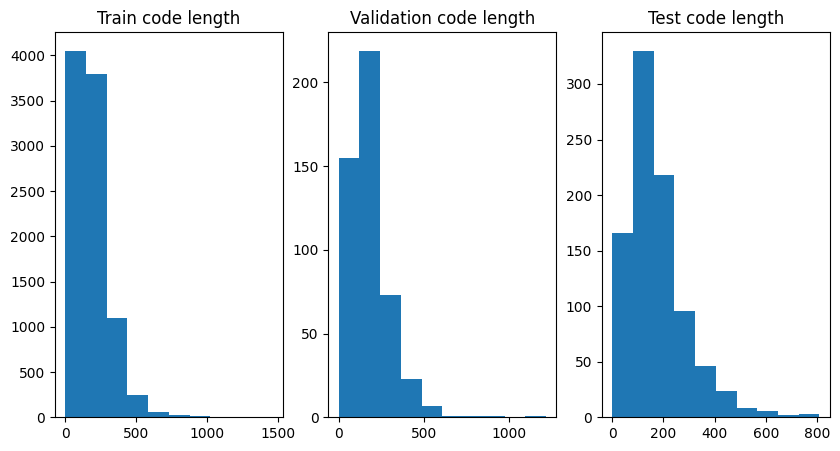

In [56]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
lengths = np.array([len(code) for code in train_data["code_tokens"]])
plt.hist(lengths)
plt.title('Train code length')
print(f'Train code number of tokens mean and std: {round(lengths.mean(), 4)}±{round(lengths.std(), 4)} with {lengths.min()} <= code_len <= {lengths.max()}')
plt.subplot(132)
lengths = [len(code) for code in valid_data["code_tokens"]]
plt.hist(lengths)
plt.title('Validation code length')
plt.subplot(133)
lengths = [len(code) for code in test_data["code_tokens"]]
plt.title('Test code length')
plt.hist(lengths)

<BarContainer object of 20 artists>

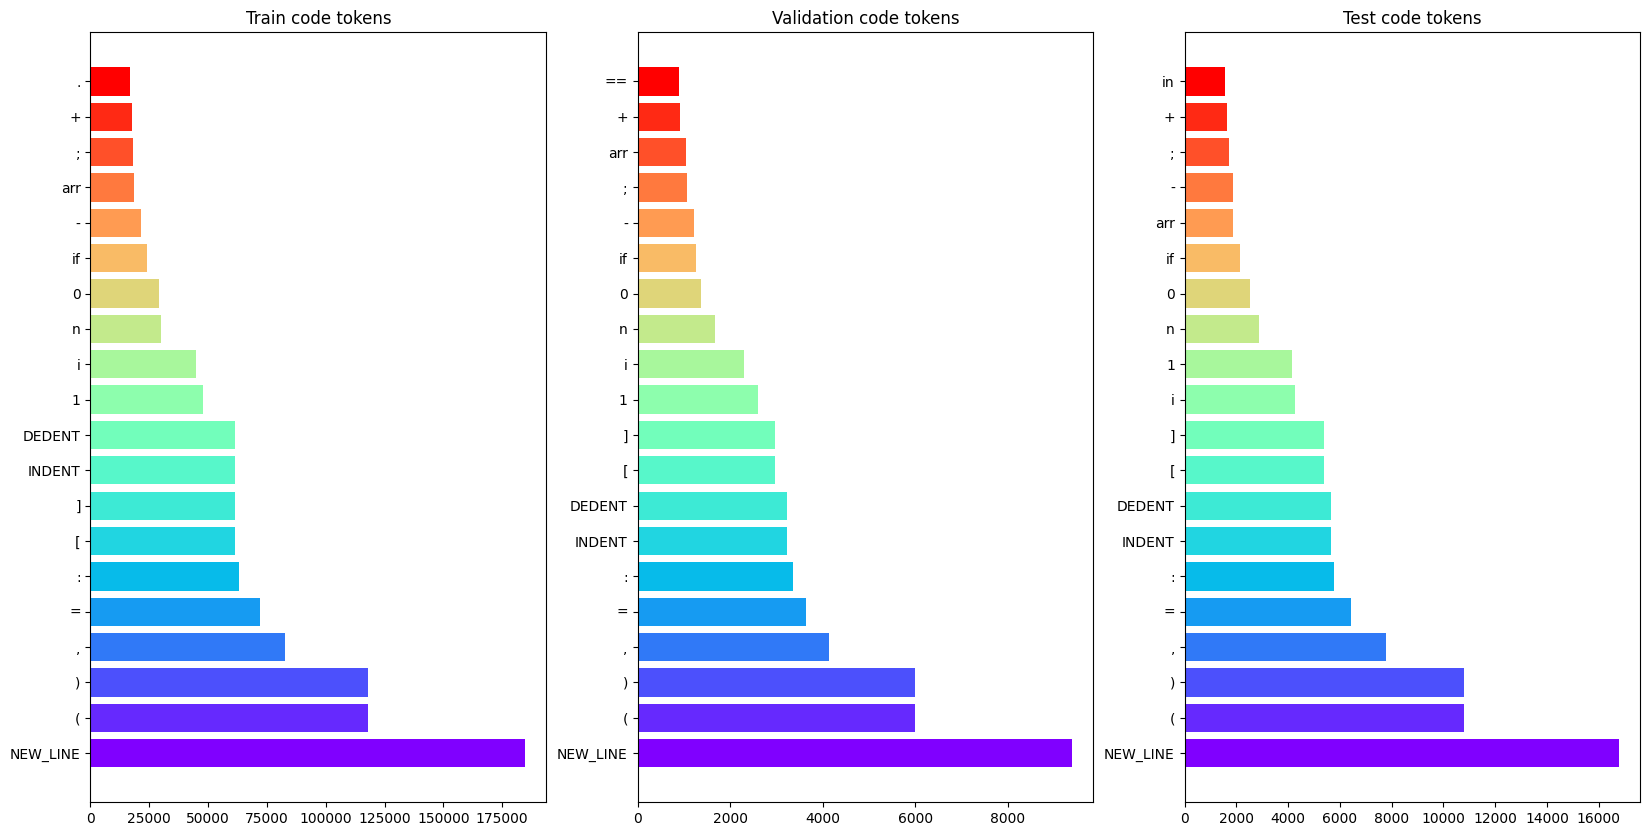

In [57]:
plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.title('Train code tokens')
train_tokens = [token for code in train_data["code_tokens"] for token in code]
train_tokens_counter = Counter(train_tokens)
train_tokens_counter = train_tokens_counter.most_common(20)
train_tokens_counter = dict(train_tokens_counter)
colors = plt.cm.rainbow(np.linspace(0, 1, len(train_tokens_counter)))
plt.barh(list(train_tokens_counter.keys()), list(train_tokens_counter.values()), color=colors)

plt.subplot(132)
plt.title('Validation code tokens')
valid_tokens = [token for code in valid_data["code_tokens"] for token in code]
valid_tokens_counter = Counter(valid_tokens)
valid_tokens_counter = valid_tokens_counter.most_common(20)
valid_tokens_counter = dict(valid_tokens_counter)
colors = plt.cm.rainbow(np.linspace(0, 1, len(valid_tokens_counter)))
plt.barh(list(valid_tokens_counter.keys()), list(valid_tokens_counter.values()), color=colors)

plt.subplot(133)
plt.title('Test code tokens')
test_tokens = [token for code in test_data["code_tokens"] for token in code]
test_tokens_counter = Counter(test_tokens)
test_tokens_counter = test_tokens_counter.most_common(20)
test_tokens_counter = dict(test_tokens_counter)
colors = plt.cm.rainbow(np.linspace(0, 1, len(test_tokens_counter)))
plt.barh(list(test_tokens_counter.keys()), list(test_tokens_counter.values()), color=colors)

In [58]:
#count number of unique tokens
print(f'Train unique tokens: {len(set(train_tokens))}')
print(f'Validation unique tokens: {len(set(valid_tokens))}')
print(f'Test unique tokens: {len(set(test_tokens))}')

Train unique tokens: 18820
Validation unique tokens: 1742
Test unique tokens: 2690


## Snippet level


In [59]:
train_data = pd.read_json(f'{PATH}/snippet_level/Python/train.jsonl', lines=True)
test_data = pd.read_json(f'{PATH}/snippet_level/Python/test.jsonl', lines=True)
valid_data = pd.read_json(f'{PATH}/snippet_level/Python/valid.jsonl', lines=True)

In [60]:
train_data.head()

,idx,docstring_tokens,code_tokens,url
0,100051,"[Python3, implementation, of, the, above, appr...","[def, maxPresum, (, a, ,, b, ), :, NEW_LINE]",10005-Python-1
1,100052,"[Stores, the, maximum, prefix, sum, of, the, a...","[X, =, max, (, a, [, 0, ], ,, 0, ), NEW_LINE]",10005-Python-2
2,100053,"[Traverse, the, array, A, [, ]]","[for, i, in, range, (, 1, ,, len, (, a, ), ), ...",10005-Python-3
3,100054,"[Stores, the, maximum, prefix, sum, of, the, a...","[Y, =, max, (, b, [, 0, ], ,, 0, ), NEW_LINE]",10005-Python-4
4,100055,"[Traverse, the, array, B, [, ]]","[for, i, in, range, (, 1, ,, len, (, b, ), ), ...",10005-Python-5


In [61]:
display(train_data.shape)
display(test_data.shape)
display(valid_data.shape)

(80230, 4)

(7307, 4)

(3961, 4)

In [62]:
display(train_data.info())
display(test_data.info())
display(valid_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80230 entries, 0 to 80229
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   idx               80230 non-null  int64 
 1   docstring_tokens  80230 non-null  object
 2   code_tokens       80230 non-null  object
 3   url               80230 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7307 entries, 0 to 7306
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   idx               7307 non-null   int64 
 1   docstring_tokens  7307 non-null   object
 2   code_tokens       7307 non-null   object
 3   url               7307 non-null   object
dtypes: int64(1), object(3)
memory usage: 228.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   idx               3961 non-null   int64 
 1   docstring_tokens  3961 non-null   object
 2   code_tokens       3961 non-null   object
 3   url               3961 non-null   object
dtypes: int64(1), object(3)
memory usage: 123.9+ KB


None

Train code number of tokens mean and std: 21.6224±21.2318 with 0 <= code_len <= 569


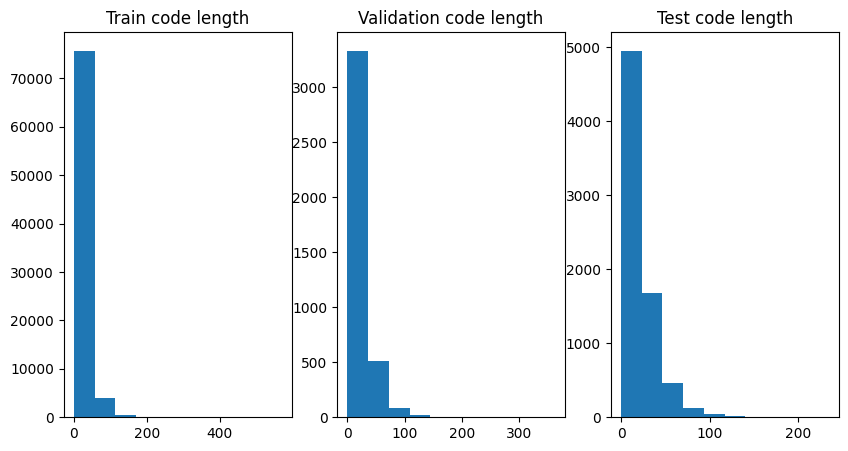

In [63]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
lengths = np.array([len(code) for code in train_data["code_tokens"]])
plt.hist(lengths)
plt.title('Train code length')
print(f'Train code number of tokens mean and std: {round(lengths.mean(), 4)}±{round(lengths.std(), 4)} with {lengths.min()} <= code_len <= {lengths.max()}')
plt.subplot(132)
lengths = [len(code) for code in valid_data["code_tokens"]]
plt.hist(lengths)
plt.title('Validation code length')
plt.subplot(133)
lengths = [len(code) for code in test_data["code_tokens"]]
plt.title('Test code length')
plt.hist(lengths);

<BarContainer object of 20 artists>

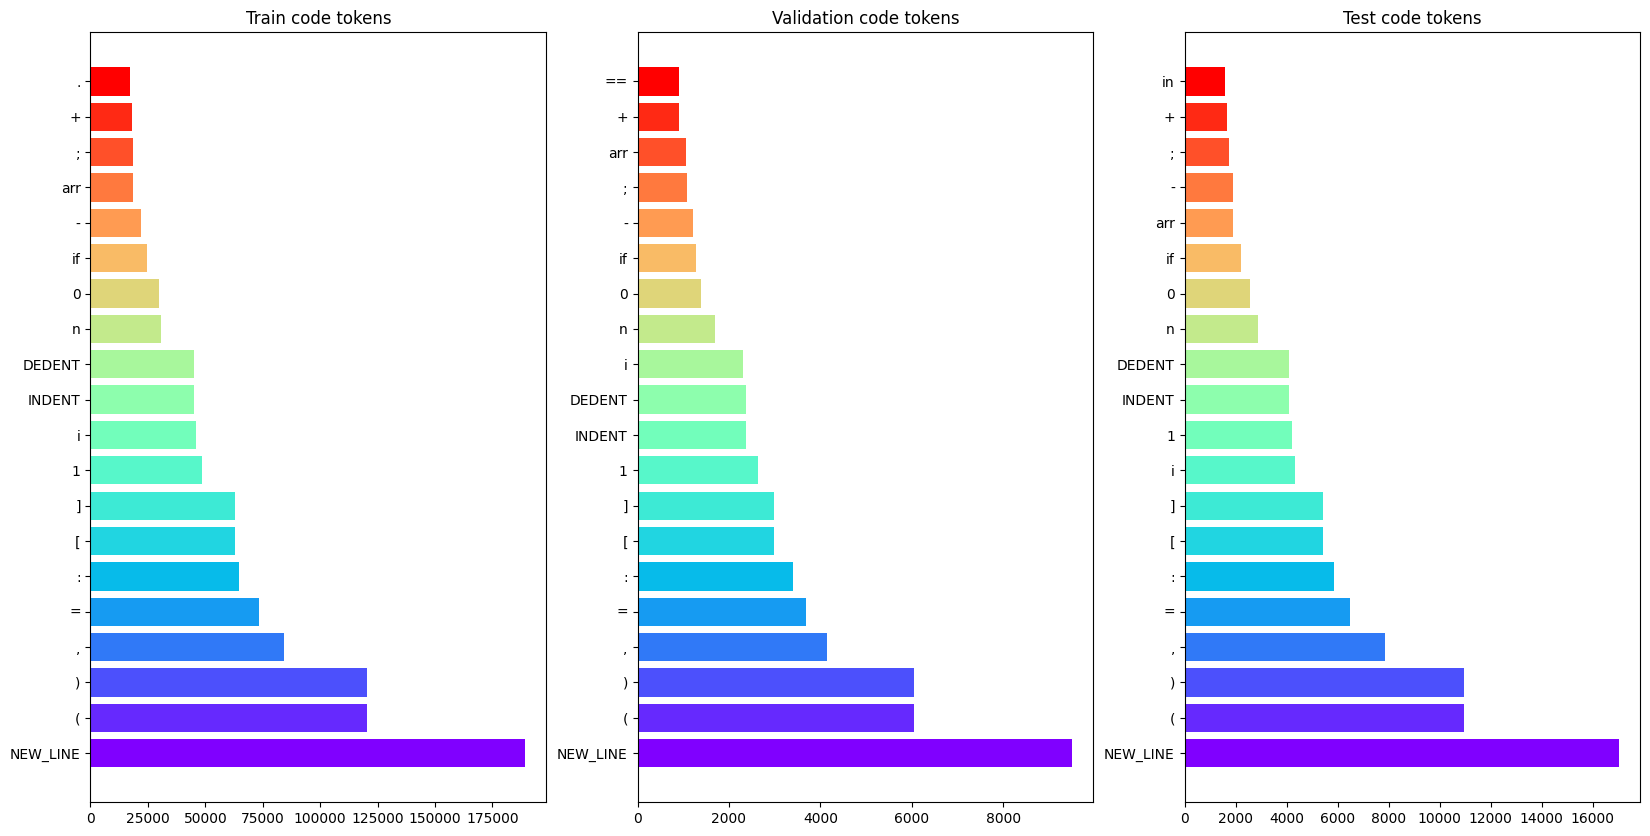

In [64]:
plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.title('Train code tokens')
train_tokens = [token for code in train_data["code_tokens"] for token in code]
train_tokens_counter = Counter(train_tokens)
train_tokens_counter = train_tokens_counter.most_common(20)
train_tokens_counter = dict(train_tokens_counter)
colors = plt.cm.rainbow(np.linspace(0, 1, len(train_tokens_counter)))
plt.barh(list(train_tokens_counter.keys()), list(train_tokens_counter.values()), color=colors)

plt.subplot(132)
plt.title('Validation code tokens')
valid_tokens = [token for code in valid_data["code_tokens"] for token in code]
valid_tokens_counter = Counter(valid_tokens)
valid_tokens_counter = valid_tokens_counter.most_common(20)
valid_tokens_counter = dict(valid_tokens_counter)
colors = plt.cm.rainbow(np.linspace(0, 1, len(valid_tokens_counter)))
plt.barh(list(valid_tokens_counter.keys()), list(valid_tokens_counter.values()), color=colors)

plt.subplot(133)
plt.title('Test code tokens')
test_tokens = [token for code in test_data["code_tokens"] for token in code]
test_tokens_counter = Counter(test_tokens)
test_tokens_counter = test_tokens_counter.most_common(20)
test_tokens_counter = dict(test_tokens_counter)
colors = plt.cm.rainbow(np.linspace(0, 1, len(test_tokens_counter)))
plt.barh(list(test_tokens_counter.keys()), list(test_tokens_counter.values()), color=colors)

In [65]:
#count number of unique tokens
print(f'Train unique tokens: {len(set(train_tokens))}')
print(f'Validation unique tokens: {len(set(valid_tokens))}')
print(f'Test unique tokens: {len(set(test_tokens))}')

Train unique tokens: 19161
Validation unique tokens: 1766
Test unique tokens: 2718
